<a href="https://colab.research.google.com/github/ShashwatVyas926/AER850_Project_2/blob/main/Project_2_Step_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model loaded successfully
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


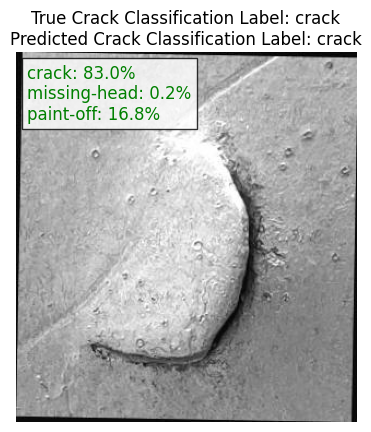

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


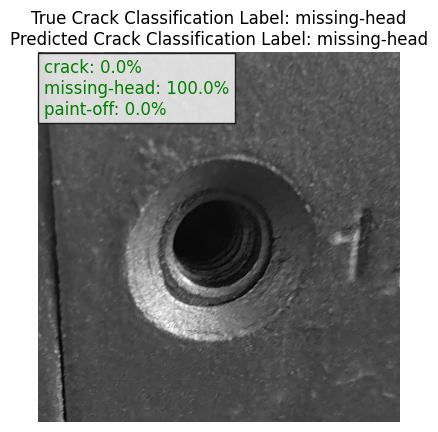

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


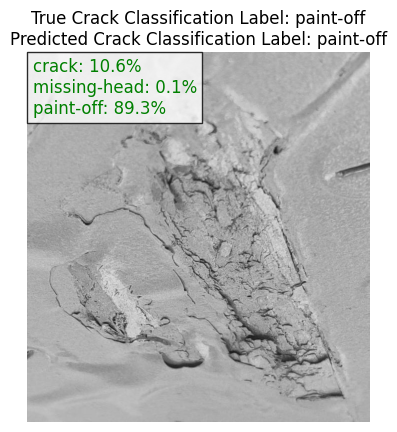

In [18]:
# Model Testing
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

image_size = (500, 500)
class_labels = ['crack', 'missing-head', 'paint-off']

model_path = "/content/drive/MyDrive/AER850_Project_2/trained_model.h5"
model = load_model(model_path)
print("Model loaded successfully")

def preprocess_test_image(image_path):
    img = load_img(image_path, target_size=image_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_and_display(image_path, true_label):
    test_image = preprocess_test_image(image_path)
    prediction = model.predict(test_image)
    predicted_class_index = np.argmax(prediction)
    predicted_class_label = class_labels[predicted_class_index]
    predicted_probability = prediction[0][predicted_class_index]

    probabilities_text = "\n".join([
        f"{class_labels[i]}: {prediction[0][i] * 100:.1f}%" for i in range(len(class_labels))
    ])

    plt.imshow(load_img(image_path))
    plt.title(f"True Crack Classification Label: {true_label}\n"
              f"Predicted Crack Classification Label: {predicted_class_label}")
    plt.axis('off')

    plt.text(10, 10, probabilities_text, fontsize=12, color='green', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))
    plt.show()

test_images = [
    ("/content/drive/MyDrive/AER850_Project_2/Data/test/crack/test_crack.jpg", "crack"),
    ("/content/drive/MyDrive/AER850_Project_2/Data/test/missing-head/test_missinghead.jpg", "missing-head"),
    ("/content/drive/MyDrive/AER850_Project_2/Data/test/paint-off/test_paintoff.jpg", "paint-off")
]

for image_path, true_label in test_images:
    predict_and_display(image_path, true_label)
